In [1]:
# 處理 array
import numpy as np

# 產生隨機 list，用於隨機產生出一組合法解
import random

# 計算平方、絕對值
import math

# data visualisation and manipulation
# 畫收斂圖
import matplotlib.pyplot as plt

In [2]:
# STEP 1 Initialization:
# 隨機產生出一組合法解 (至多2的15次方種可能解)

def ramdomSolution():
    # 隨機生成 4 bits 0/1 長度
    string_status = [ random.randint(0,1) for _ in range(n)]
    
    #計算初始解適應值
    current_value = Evaluation(string_status)
            
    return string_status, current_value

In [3]:
# STEP 2 Transition: 產生一個或多個解 隨機 / 左右 移動
# 找鄰近解
# 採隨機移動 (1)將任一位置 0換成 1 1換成 0 
# 採左右移動 (2)將任兩不同值位置 0、1對調  

def getNeighbor(solution):
    
    neightbor_sol = solution.copy()

    """
    # 採左右移動 (1)使解往左走+1或往右走-1 0001->0010 or 0001->0000
    # 採左移 +1
    # 二進位左移 +1 ，超過歸 bit數 0 (ex: [1, 1, 1, 1] +1 -> [0, 0, 0, 0])
    for i in range(n-1,-1,-1):
        if(neightbor_sol[i] == 0):
            neightbor_sol[i] = 1
            break
        else:
            neightbor_sol[i] = 0
    
    """
    # 採隨機移動 (2)隨機找其中一個bit 0換成 1 1換成 0 
        
    i = random.randint(0,n-1)

    # 多一個 1 
    if(neightbor_sol[i] == 0):
        neightbor_sol[i]=1
    # 少一個 1 
    else: 
        neightbor_sol[i] = 0
 
    neighbor_value = Evaluation(neightbor_sol)
    
    return neightbor_sol, neighbor_value
    
# n=4
# getNeighbor([0,1,1,0])


In [4]:
# STEP 3 Evaluation: 評估一個或多個解 適應值(Fitness value)大小
# 公式為|(二進位轉十進位)-2^(n-2)| ex:1111帶入公式：|15-2^(4-2)|=11

def Evaluation(solution):

    # 陣列轉字串
    str_sol = "".join([str(_) for _ in solution])

    # str轉int 2進位 轉 10進位
    dec_sol = int(str_sol,2)

    # 適應值 公式 |(二進位轉十進位)-2^(n-2)|
    sol_val = abs( dec_sol - math.pow(2,n-2))
    
    return sol_val
    

In [5]:
# STEP 4 Determination: 將 STEP 3 評估出的適應值與先前的進行比較
# 退火環節:
# 使用退火溫度(T)和適應值的差值(Δf)計算出允許機率，接著隨機一個0–1的浮點數(r)，若該隨機值(r)≤允許機率則進行更新

def simulatedAnnealing(current_sol, currrent_value):
    
    neightbor_sol, neighbor_value = getNeighbor(current_sol)
    #print("\n鄰近解: " + str(neightbor_sol))
    #print("鄰近解獲利: " + str(neighbor_value))

    # 鄰近解若優於或等於先前解則更新
    if(currrent_value <= neighbor_value):

        current_sol = neightbor_sol
        currrent_value = neighbor_value

    # 若差於先前解則進行退火環節
    else:

        # 隨機值(r:0~1的浮點數)
        r = random.random()

        # Δf < 0 ，故找最大值為: 鄰近解 - 先前解
        Δf = (neighbor_value - currrent_value)
        accept_p = np.exp( (neighbor_value - currrent_value) / current_temperature )

        #print("r,accept_p,Δf")
        #print(r,accept_p,Δf)
        #print(min(r,accept_p))

        # 隨機值(r:0~1的浮點數) ≤ 允許機率則進行更新
        # e的指數若是一個很小的負值，計算後的值會較接近1，差值較小的情形能有比較大的機率接受更新
        if(r <= accept_p):
            current_sol = neightbor_sol
            currrent_value = neighbor_value
            #print("接受差值")
    
    return current_sol, currrent_value
    

In [6]:
def plotIteration(value_history, iteration):
    
    iterationTime = iteration

    plt.title('circle of average convergence')
    plt.plot(range(1, iterationTime + 1), value_history, label='Objective Value')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Value')
    plt.legend()
    plt.grid()
    plt.show()

In [7]:
# STEP 0 Setting: 初始參數:

global n,iteration,run; 

# 4 bits
n = 4 
print("bit 數:",n)

# 迭代次數(Iteration)
iteration = 1000

# 平均迭代1次 run 次數
run = 51

# 初始溫度(T) 退火溫度
current_temperature = 14.0

# 退火係數(Rₜ)
Rₜ = 0.95

bit 數: 4


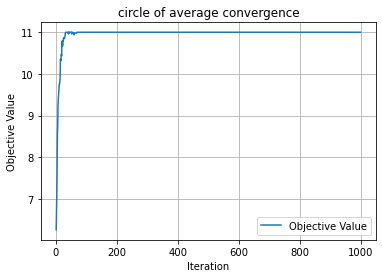

最佳解:  [1, 1, 1, 1]
最佳值:  11.0
最佳平均解值 11.0


In [8]:
# STEP 1 Initial:
# 隨機產生出一組合法解 

# 採隨機移動 變數
# 採隨機移動 加總 51run 並計算平均
avg_val = 0
total_val = 0

# 紀錄每次採隨機移動迭代的值
iteration_history = []

# 紀錄採隨機移動最佳解及最佳值
best_sol = []
best_value = 0

# 跑51次run平均1000次迭代
for i in range(run):
    
    # 新的一 run 先清空解暫存
    temp_history = []
    
    # STEP 1 Initial:
    # 隨機產生出一組合法解 
    current_sol, currrent_value = ramdomSolution()
    best_sol, best_value = current_sol, currrent_value

    # 迭代 1000 次停止
    for k in range(iteration):

        current_sol, currrent_value = simulatedAnnealing(current_sol, currrent_value)

        # 紀錄採隨機移動每次的值
        temp_history.append(currrent_value)
        # 紀錄採隨機移動最佳解及最佳值
        if(currrent_value > best_value):
            best_value = currrent_value
            best_sol = current_sol
        
        # 每次迭代的最後皆需進行降溫動作(T = T * Rₜ)，會將溫度T乘上一個小於1的數值(Rₜ)，Rₜ的數值大小取決於想要的收斂速度
        # T (T = T * Rₜ) 會隨著迭代的進行而越來越小，從初始值1開始，隨著迭代不斷下降
        # Δf( Δf = 鄰近解 - 先前解) 除上一個小於1的值(T)，會將 Δf 的值放大，變成一個更大的負數
        # e的指數若是一個很大的負值，計算後的值會很接近 0，成功更新的機率變得更低
        current_temperature = current_temperature * Rₜ

    # 紀錄採隨機移動每次迭代的值
    iteration_history.append(temp_history)

# list 轉 np array 方便平均計算
value_history = np.array(iteration_history)

# 加總每一行
total_val = value_history.sum(axis=0)
# 跑 51次平均值
avg_val = total_val / run

# 畫採隨機移動的平均收斂圖
plotIteration(avg_val, iteration)
print("最佳解: ", best_sol)
print("最佳值: " ,best_value)
print("最佳平均解值",max(avg_val)) 
    
